In [35]:
# Written by Rahi Misra
# This file is final fixes/review after filling missing values and encoding
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("final_encoded_data-1.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_9316\163105758.py:7: DtypeWarning: Columns (5,54,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_encoded_data-1.csv")


In [36]:
df.dtypes

tourney_name      object
player1_ioc       object
player2_ioc       object
player1_seed       int64
player2_seed       int64
                   ...  
surface_Carpet     int64
surface_Clay       int64
surface_Grass      int64
surface_Hard       int64
surface_U          int64
Length: 91, dtype: object

In [37]:
df.columns.tolist()

['tourney_name',
 'player1_ioc',
 'player2_ioc',
 'player1_seed',
 'player2_seed',
 'tourney_level',
 'round',
 'player1_hand',
 'player2_hand',
 'best_of',
 'surface',
 'draw_size',
 'tourney_name_0',
 'tourney_name_1',
 'tourney_name_2',
 'tourney_name_3',
 'tourney_name_4',
 'tourney_name_5',
 'tourney_name_6',
 'tourney_name_7',
 'tourney_name_8',
 'tourney_name_9',
 'tourney_name_10',
 'tourney_name_11',
 'tourney_name_12',
 'tourney_name_13',
 'tourney_level_0',
 'tourney_level_1',
 'tourney_level_2',
 'tourney_level_3',
 'tourney_date',
 'round_0',
 'round_1',
 'round_2',
 'round_3',
 'round_4',
 'player1',
 'player1_age',
 'player1_height',
 'player1_ioc_0',
 'player1_ioc_1',
 'player1_ioc_2',
 'player1_ioc_3',
 'player1_ioc_4',
 'player1_ioc_5',
 'player1_ioc_6',
 'player1_ioc_7',
 'player1_rank',
 'player1_seed_0',
 'player1_seed_1',
 'player1_seed_2',
 'player1_seed_3',
 'player1_seed_4',
 'player1_seed_5',
 'player1_entry',
 'player2',
 'player2_age',
 'player2_height',
 'p

In [38]:
df['tourney_name'].value_counts().tolist()

[16799,
 16616,
 13142,
 10121,
 5085,
 3711,
 3699,
 3434,
 3147,
 3072,
 2912,
 2443,
 2429,
 2428,
 2299,
 2218,
 2185,
 2069,
 2029,
 1973,
 1970,
 1953,
 1944,
 1904,
 1862,
 1854,
 1850,
 1845,
 1815,
 1730,
 1640,
 1602,
 1533,
 1484,
 1450,
 1419,
 1389,
 1387,
 1367,
 1310,
 1284,
 1280,
 1278,
 1270,
 1270,
 1253,
 1247,
 1238,
 1232,
 1228,
 1227,
 1227,
 1222,
 1219,
 1213,
 1210,
 1199,
 1196,
 1196,
 1184,
 1176,
 1170,
 1143,
 1134,
 1116,
 1115,
 1111,
 1094,
 1093,
 1085,
 1064,
 1062,
 1061,
 1055,
 1053,
 1043,
 1035,
 995,
 991,
 991,
 990,
 989,
 987,
 985,
 982,
 961,
 958,
 958,
 955,
 953,
 948,
 947,
 937,
 923,
 922,
 919,
 919,
 913,
 912,
 902,
 899,
 893,
 892,
 888,
 876,
 859,
 858,
 850,
 844,
 839,
 839,
 837,
 836,
 830,
 828,
 820,
 820,
 819,
 819,
 816,
 814,
 813,
 785,
 781,
 781,
 779,
 770,
 769,
 766,
 763,
 762,
 755,
 747,
 747,
 744,
 739,
 735,
 733,
 732,
 731,
 728,
 724,
 718,
 715,
 715,
 715,
 715,
 715,
 715,
 713,
 708,
 699,
 699,
 

In [39]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['tourney_name', 'player1_ioc', 'player2_ioc', 'tourney_level', 'round', 'player1_hand', 'player2_hand', 'surface', 'tourney_date', 'player1', 'player1_entry', 'player2', 'player2_entry']


In [40]:
numeric_features = ['draw_size', 'player1_seed', 'player1_height', 'player1_age', 'player1_rank', 'player2_seed', 'player2_height', 'player2_age', 'player2_rank']

In [41]:
# Summary Statistics
for column in numeric_features:
  Summary = df[column].describe()

  Count = Summary['count']
  Mean = Summary['mean']
  STD = Summary['std']
  Min = Summary['min']
  Max = Summary['max']
  Q1 = Summary['25%']
  Q2 = Summary['50%']
  Q3 = Summary['75%']

  # Calculate the IQR
  IQR = Q3 - Q1

  # Calculate the range
  Range = Max - Min

  # Calculate the Variance
  Variance = STD**2

  # Extract the mode values
  Mode = df[column].mode()
  Modes = Mode.tolist()

  # Calculate the skew
  Skew = df[column].skew()

  # Print each statistic on a new line
  print(f"\nColumn: {column}")
  print(f"Count: {Count: .3f}")
  print(f"Mean: {Mean: .3f}")
  print(f"Mode: {Modes}")
  print(f"Standard Deviation: {STD: .3f}")
  print(f"Variance: {Variance: .3f}")
  print(f"Min: {Min: .3f}")
  print(f"Max: {Max: .3f}")
  print(f"25th Percentile (Q1): {Q1: .3f}")
  print(f"50th Percentile (Median, Q2): {Q2: .3f}")
  print(f"75th Percentile (Q3): {Q3: .3f}")
  print(f"IQR: {IQR: .3f}")
  print(f"Range: {Range: .3f}")
  print(f"Skew: {Skew: .3f}")


Column: draw_size
Count:  899360.000
Mean:  39.837
Mode: [32]
Standard Deviation:  24.833
Variance:  616.703
Min:  2.000
Max:  128.000
25th Percentile (Q1):  32.000
50th Percentile (Median, Q2):  32.000
75th Percentile (Q3):  32.000
IQR:  0.000
Range:  126.000
Skew:  2.732

Column: player1_seed
Count:  899360.000
Mean:  4.342
Mode: [4]
Standard Deviation:  2.240
Variance:  5.020
Min:  1.000
Max:  35.000
25th Percentile (Q1):  4.000
50th Percentile (Median, Q2):  4.000
75th Percentile (Q3):  4.000
IQR:  0.000
Range:  34.000
Skew:  5.158

Column: player1_height
Count:  899360.000
Mean:  184.088
Mode: [184]
Standard Deviation:  4.824
Variance:  23.267
Min:  145.000
Max:  211.000
25th Percentile (Q1):  183.000
50th Percentile (Median, Q2):  184.000
75th Percentile (Q3):  185.000
IQR:  2.000
Range:  66.000
Skew:  0.180

Column: player1_age
Count:  899360.000
Mean:  23.387
Mode: [23]
Standard Deviation:  4.054
Variance:  16.431
Min:  14.000
Max:  100.000
25th Percentile (Q1):  20.000
50th P

draw_size            Axes(0.125,0.747241;0.352273x0.132759)
player1_seed      Axes(0.547727,0.747241;0.352273x0.132759)
player1_height       Axes(0.125,0.587931;0.352273x0.132759)
player1_age       Axes(0.547727,0.587931;0.352273x0.132759)
player1_rank         Axes(0.125,0.428621;0.352273x0.132759)
player2_seed      Axes(0.547727,0.428621;0.352273x0.132759)
player2_height        Axes(0.125,0.26931;0.352273x0.132759)
player2_age        Axes(0.547727,0.26931;0.352273x0.132759)
player2_rank             Axes(0.125,0.11;0.352273x0.132759)
dtype: object

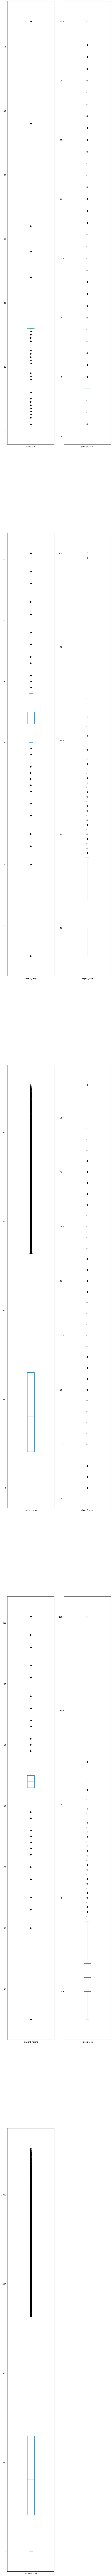

In [42]:
# Boxplot
df[numeric_features].plot(kind='box', subplots=True, layout=(5, 2), figsize=(10, 250), sharex=False, sharey=False)

In [43]:
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

draw_size           0.0
player1_seed        0.0
player1_height      2.0
player1_age         6.0
player1_rank      446.0
player2_seed        0.0
player2_height      2.0
player2_age         6.0
player2_rank      445.0
dtype: float64


In [44]:
# Identify Outliers

threshold = 1.5
for feature in numeric_features:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    print(f"Outliers for {feature}:")
    print(outliers[feature])

Outliers for draw_size:
31         16
32         16
33         16
34         16
35         16
         ... 
892610    128
892611    128
892612    128
892613    128
892614    128
Name: draw_size, Length: 197885, dtype: int64
Outliers for player1_seed:
52         7
54         5
56         3
58         1
60         7
          ..
899355     8
899356     5
899357     7
899358     6
899359    10
Name: player1_seed, Length: 253292, dtype: int64
Outliers for player1_height:
16        178
18        179
24        178
28        178
30        178
         ... 
899346    178
899347    193
899352    196
899356    178
899358    193
Name: player1_height, Length: 204248, dtype: int64
Outliers for player1_age:
6         42
25        42
49        44
53        36
67        40
          ..
899132    36
899144    36
899337    38
899344    38
899352    38
Name: player1_age, Length: 6346, dtype: int64
Outliers for player1_rank:
112543    1358
113197    1366
113593    1367
113596    1329
114061    1373
      

In [45]:
# Find highest and lowest values
for feature in numeric_features:
    
    highest_value = df[numeric_features].max()
    lowest_value = df[numeric_features].min()

print(f"Highest {numeric_features}: {highest_value}")
print(f"Lowest {numeric_features}: {lowest_value}")


Highest ['draw_size', 'player1_seed', 'player1_height', 'player1_age', 'player1_rank', 'player2_seed', 'player2_height', 'player2_age', 'player2_rank']: draw_size          128
player1_seed        35
player1_height     211
player1_age        100
player1_rank      2267
player2_seed        38
player2_height     211
player2_age        100
player2_rank      2259
dtype: int64
Lowest ['draw_size', 'player1_seed', 'player1_height', 'player1_age', 'player1_rank', 'player2_seed', 'player2_height', 'player2_age', 'player2_rank']: draw_size           2
player1_seed        1
player1_height    145
player1_age        14
player1_rank        1
player2_seed        1
player2_height    145
player2_age        14
player2_rank        1
dtype: int64


In [46]:
from datetime import datetime

# Convert the date to datetime object
df['tourney_date'] = pd.to_datetime(df['tourney_date'])

# Calculate the difference in days from todays date
# Make days from today feature
reference_date = datetime.now()
df['days_from_today'] = (reference_date - df['tourney_date']).dt.days

print(df)

       tourney_name player1_ioc player2_ioc  player1_seed  player2_seed  \
0            Dublin         AUS         IRL             4             4   
1            Dublin         IRL         RSA             4             4   
2            Dublin         IRL         IRL             4             4   
3            Dublin           U         NED             4             4   
4            Dublin         USA         IRL             4             4   
...             ...         ...         ...           ...           ...   
899355     Tulln CH         RUS         AUT             8             4   
899356     Tulln CH         GER         BIH             5             4   
899357     Tulln CH         RUS         GER             7             4   
899358     Tulln CH         SLO         UKR             6             4   
899359     Tulln CH         ITA         AUT            10             4   

       tourney_level round player1_hand player2_hand  best_of  ...  \
0                  A   R32   

In [47]:
# Drop unnecessary columns
df.drop(categorical_features, axis=1, inplace=True)

In [48]:
# Save the updated dataframe to final CSV file
df.to_csv("FinalTennisCSV.csv", index=False)